In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
pd.set_option("display.max_columns", 500)

In [4]:
conn = sqlite3.connect("eia")
cursor = conn.cursor()
df = pd.DataFrame(cursor.execute("""select * from combined5""").fetchall())
df.columns = [description[0] for description in cursor.description]
df = df.drop(columns=["index", "level_0"])
df.head()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year,plant_id_gen,combined_heat_and_power_plant,plant_name_gen,operator_name_gen,state_gen,census_region,nerc_region,reserved_,naics_code,eia_sector_number,sector_name,reported_prime_mover,reported_fuel_type_code,aer_fuel_type_code,reserved_1,reserved_2,physical_unit_label,total_fuel_consumption_quantity,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,elec_fuel_consumption_mmbtu,net_generation_megawatthours,year_gen,quantity_gen,elec_quantity_gen,mmbtu_per_unit_gen,tot_mmbtu_gen,elec_mmbtu_gen,netgen_gen,year_month_nerc,number_affected,disturbance_events
0,5.4,23.100,0.0,0.49,0.0,IMP,N/A,MINA PRIBBENOW,CL,SU,408.0,C,BIT,213.5,Coal,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,RV,N/A,259412,REG,M,N/A,INTEROCEAN COAL,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,BIT,COL,None,None,short tons,4208251,4208251,94561606,94561606,9472859,2008,340778,340778,22.59,7697153,7697153,778699,2008-1-SERC,0.0,0.0
1,5.7,22.800,0.0,0.48,0.0,IMP,N/A,MINA PRIBBENOW,CL,SU,408.0,C,BIT,211.5,Coal,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,RV,N/A,52241,REG,M,N/A,INTEROCEAN COAL,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,BIT,COL,None,None,short tons,4208251,4208251,94561606,94561606,9472859,2008,340778,340778,22.59,7697153,7697153,778699,2008-1-SERC,0.0,0.0
2,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,CA,NG,NG,None,None,mcf,3433,3433,3559,3559,1609033,2008,2400,2400,1.04,2489,2489,146327,2008-1-SERC,0.0,0.0
3,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,CT,NG,NG,None,None,mcf,30932077,30932077,32090118,32090118,2858195,2008,2781102,2781102,1.04,2884003,2884003,244784,2008-1-SERC,0.0,0.0
4,0.0,1.039,0.0,0.00,0.0,N/A,N/A,None,N/A,N/A,None,C,NG,863.1,Natural Gas,0.0,1,N/A,N/A,F,195.0,Alabama Power Co,3,Barry,AL,PL,N/A,2783619,REG,M,N/A,BAY GAS PIPELINE,2008,3,N,Barry,Alabama Power Co,AL,ESC,SERC,None,22,1,Electric Utility,ST,NG,NG,None,None,mcf,837652,837652,871270,871270,87265,2008,109281,109281,1.04,113543,113543,11487,2008-1-SERC,0.0,0.0


In [5]:
df["year_month"] = df.apply(lambda x: str(x["year"]) + "-" + str(x["month"]), axis=1)

# Largest Price Spikes - All NG

In [73]:
df.sort_values(by="fuel_cost", ascending=False)[["fuel_group", "fuel_cost"]][0:10]

,fuel_group,fuel_cost
212450,Natural Gas,23538113.0
212448,Natural Gas,23538113.0
212449,Natural Gas,23538113.0
212447,Natural Gas,23538113.0
125665,Natural Gas,11882281.0
125664,Natural Gas,11882281.0
309210,Natural Gas,8830042.9
309209,Natural Gas,8830042.9
226658,Natural Gas,8122049.0
98317,Natural Gas,7602378.4


# Visualize Price Trends

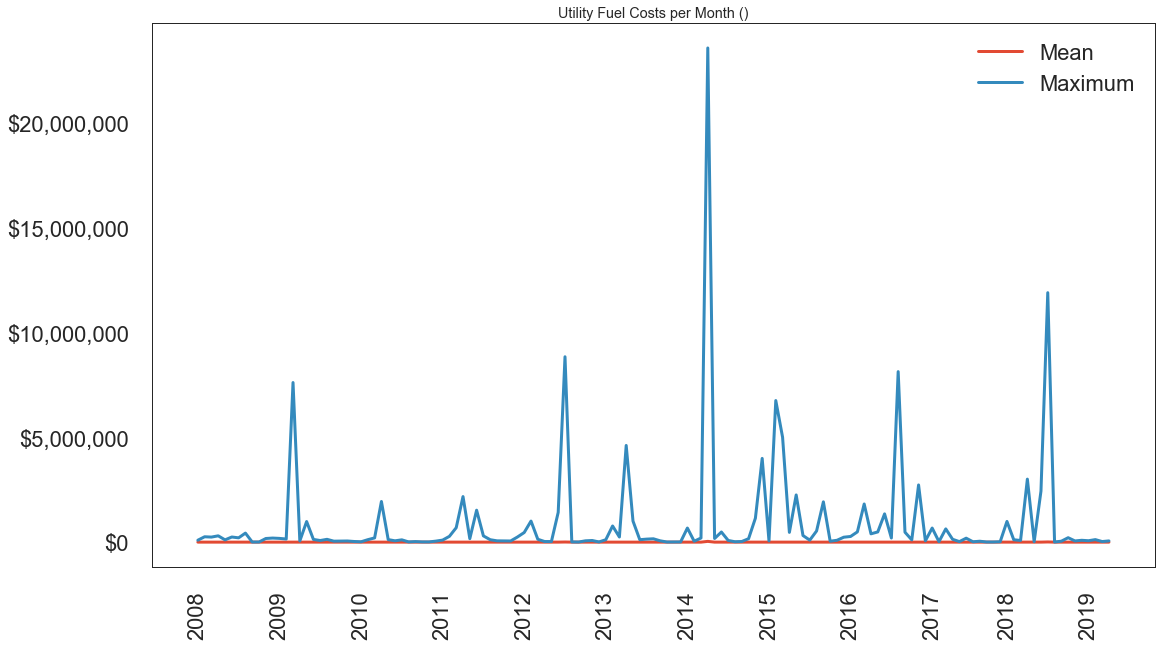

In [88]:
sns.set_style("white")

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

labels = list(mean.index)

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            


a1 = sns.lineplot(mean.index, mean["fuel_cost"], label="Mean")
a2 = sns.lineplot(max_.index, max_["fuel_cost"], label="Maximum")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
a1.set_yticklabels(yticks)

plt.title("Utility Fuel Costs per Month ()")
blah = a1.set_xticklabels(labels)

# Distribution of Prices

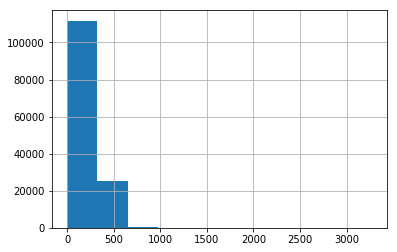

In [6]:
df[df.fuel_group == "Coal"].fuel_cost.hist()

In [8]:
df[df.fuel_group == "Coal"].fuel_cost.describe()

count    137568.000000
mean        249.022651
std          95.492070
min           0.000000
25%         183.700000
50%         229.800000
75%         299.700000
max        3267.000000
Name: fuel_cost, dtype: float64

In [11]:
df[df.fuel_group == "Coal"].fuel_cost.quantile(.97)

461.5

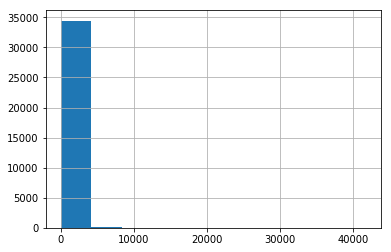

In [12]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.hist()

In [14]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.describe()

count    34644.000000
mean      1735.594972
std        731.184628
min          0.000000
25%       1296.400000
50%       1694.400000
75%       2239.625000
max      41671.200000
Name: fuel_cost, dtype: float64

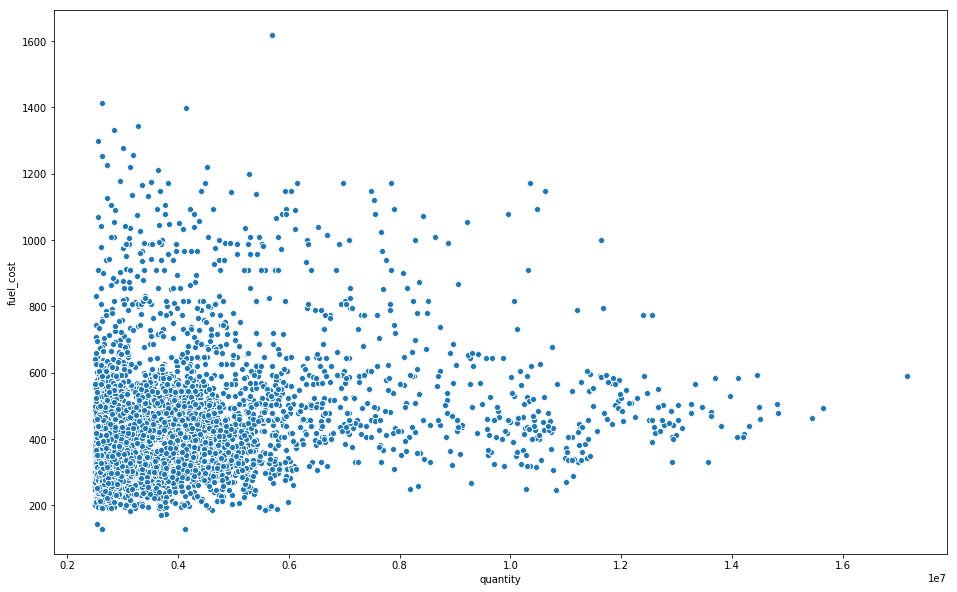

In [30]:
df2 = df[df.quantity > 2500000]
fig = plt.figure(figsize=(16,10))
sns.scatterplot(df2.quantity, df2.fuel_cost)

/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


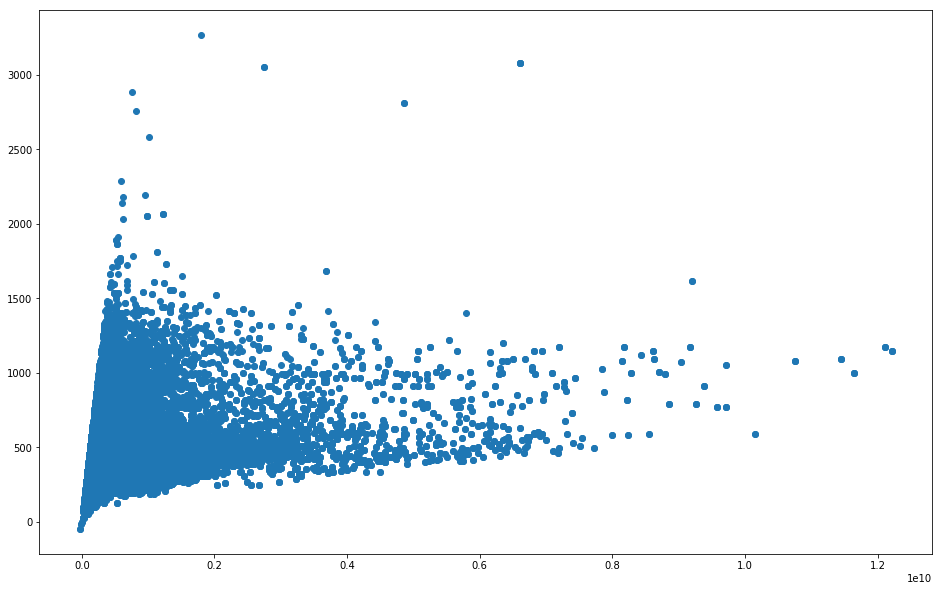

In [29]:
df2 = df[df.quantity > 250000]
df2["total"] = df2["quantity"] * df2["fuel_cost"]
fig = plt.figure(figsize=(16,10))
plt.scatter(df2.total, df2.fuel_cost)

In [22]:
df[(df.fuel_group != "Coal") & (df.fuel_group != "Natural Gas")].fuel_cost.quantile(.98)

2940.9079999999985

# Individual Suppliers

In [67]:
df = df[df["supplier"] == "JP MORGAN VENTURES ENERGY"]

JP MORGAN VENTURES ENERGY chosen as it had the highest feature importance for coal suppliers

In [68]:
mean = df.groupby("year_month").mean()
median = df.groupby("year_month").median()
max_ = df.groupby("year_month").max()


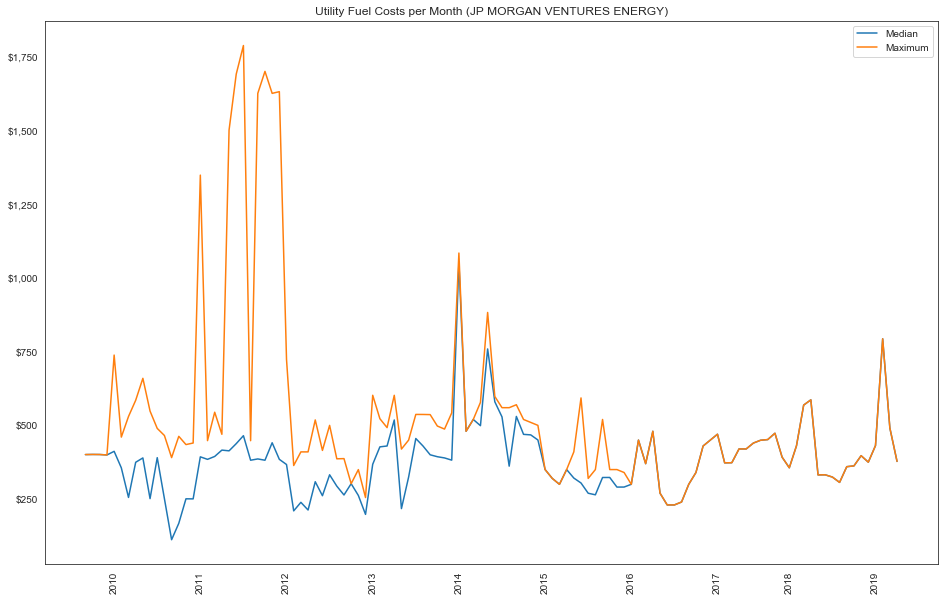

In [71]:
sns.set_style("white")

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

labels = list(mean.index)

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            


a1 = sns.lineplot(median.index, median["fuel_cost"], label="Median")
a2 = sns.lineplot(max_.index, max_["fuel_cost"], label="Maximum")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
a1.set_yticklabels(yticks)

plt.title("Utility Fuel Costs per Month (JP MORGAN VENTURES ENERGY)")
blah = a1.set_xticklabels(labels)

# Graphing Historic Costs

In [48]:
df_historic = pd.read_csv("ferc_data/all.csv")

In [49]:
df_historic.head()

,Unnamed: 0,fuel_cost,year,month
0,0,560.7,2000,1
1,1,143.3,2000,1
2,2,138.3,2000,1
3,3,130.8,2000,1
4,4,139.8,2000,1


In [58]:
df_historic["year_month"] = df_historic.apply(lambda x: str(int(x.year)) + "-" + str(int(x.month)), axis=1)

In [59]:
medians = df_historic.groupby("year_month").median()
maxes = df_historic.groupby("year_month").max()

1972-10


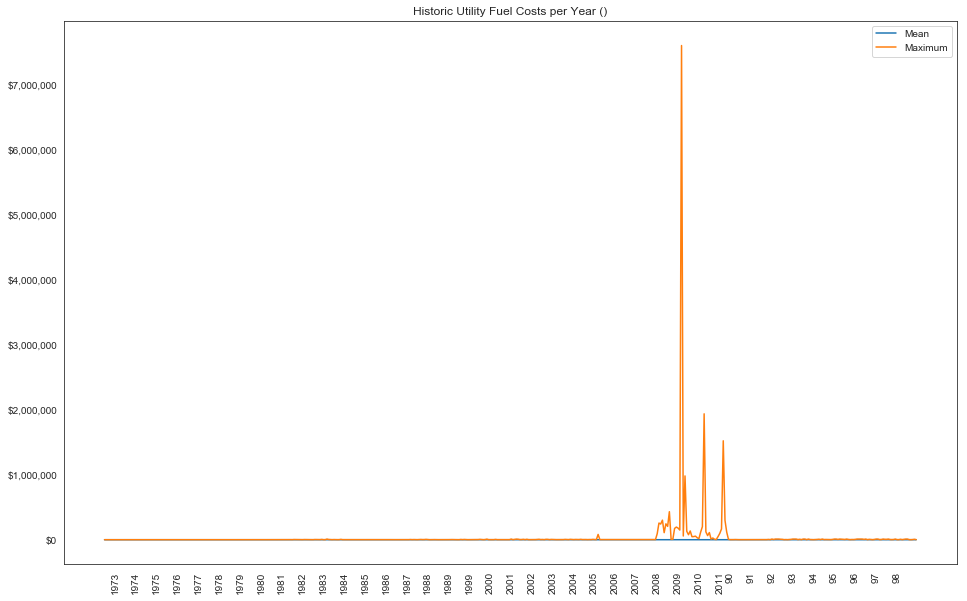

In [60]:
sns.set_style("white")

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

labels = list(medians.index)
print(labels[0])

for i,label in enumerate(labels):
    if "-" in label:
        if int(label.split("-")[1]) == 1:
            labels[i] = label.split("-")[0]
        else:
            labels[i] = ""
            

a1 = sns.lineplot(medians.index, medians["fuel_cost"], label="Mean")
a2 = sns.lineplot(maxes.index, maxes["fuel_cost"], label="Maximum")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)

plt.title("Historic Utility Fuel Costs per Year ()")
blah = a1.set_xticklabels(labels)

# Fuel Costs By Fuel Type

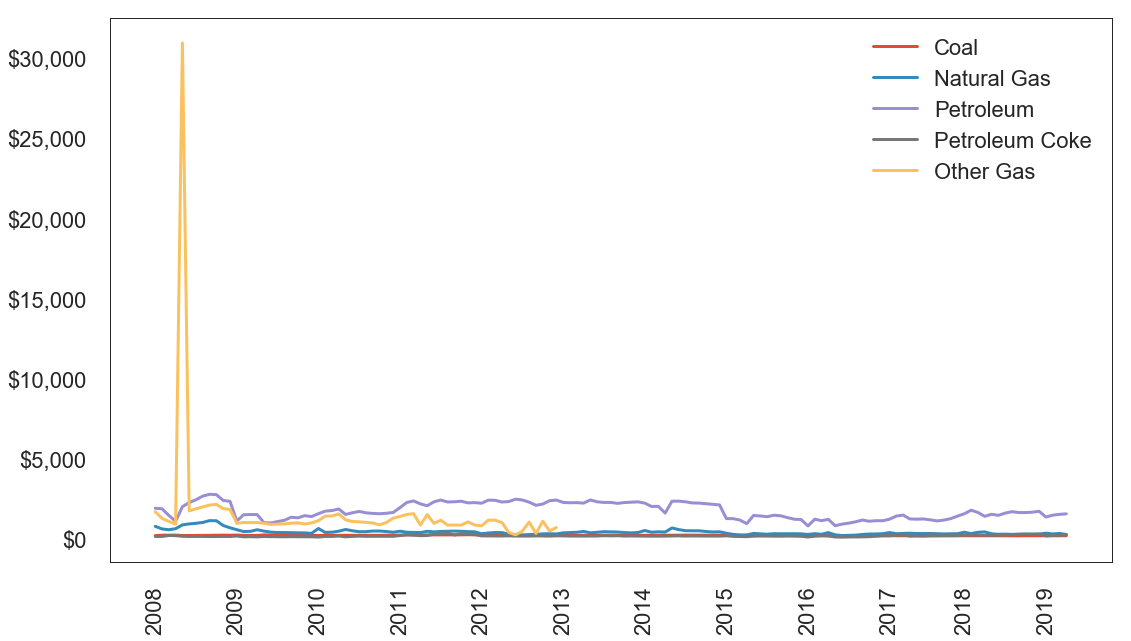

In [89]:

fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

fuel_medians = []
types = df.fuel_group.unique()
for i, fuel_type in enumerate(types):
    median = df[df.fuel_group == fuel_type].groupby("year_month").median()
    a1 = sns.lineplot(median.index, median.fuel_cost, label=fuel_type)

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
blah = a1.set_xticklabels(labels)

In [96]:
df.drop(index=5412)[(df.fuel_group == "Other Gas") & (df.year == 2008) & (df.month==2)].sort_values(by="fuel_cost", ascending=False)[0:10]

/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year,plant_id_gen,combined_heat_and_power_plant,plant_name_gen,operator_name_gen,state_gen,census_region,nerc_region,reserved_,naics_code,eia_sector_number,sector_name,reported_prime_mover,reported_fuel_type_code,aer_fuel_type_code,reserved_1,reserved_2,physical_unit_label,total_fuel_consumption_quantity,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,elec_fuel_consumption_mmbtu,net_generation_megawatthours,year_gen,quantity_gen,elec_quantity_gen,mmbtu_per_unit_gen,tot_mmbtu_gen,elec_mmbtu_gen,netgen_gen,year_month_nerc,number_affected,disturbance_events,year_month


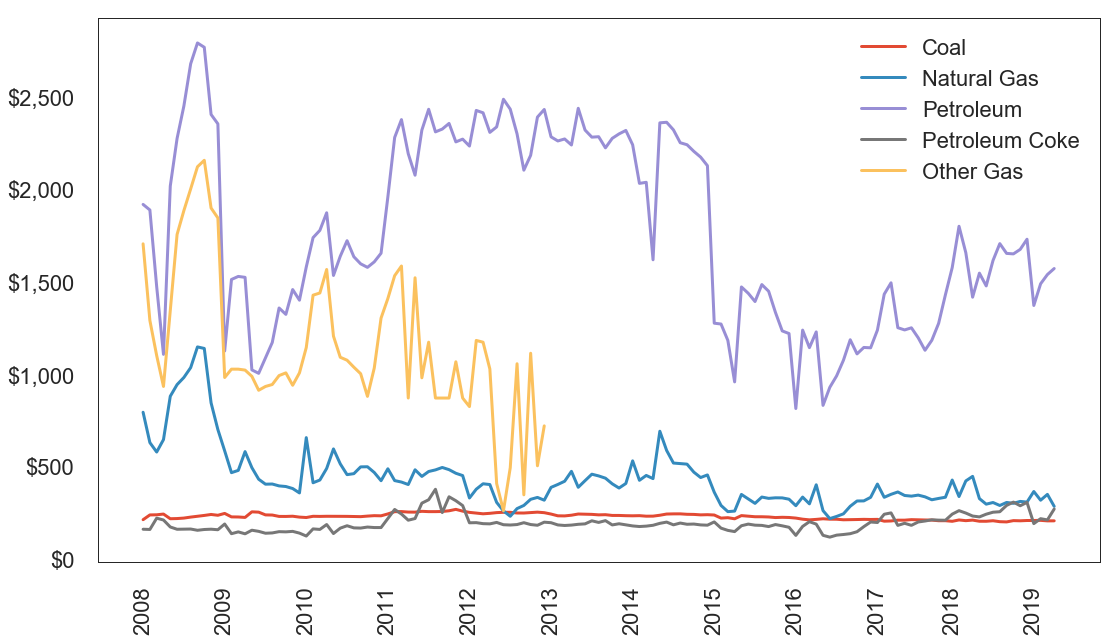

In [97]:
df = df.drop(index=5412)
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

fuel_medians = []
types = df.fuel_group.unique()
for i, fuel_type in enumerate(types):
    median = df[df.fuel_group == fuel_type].groupby("year_month").median()
    a1 = sns.lineplot(median.index, median.fuel_cost, label=fuel_type)

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
blah = a1.set_xticklabels(labels)

# Coal and Chlorine Content
Chlorine content wasn't defined for a lot of the coal data, but where it was defined, it apepared as a significant feature. 

It looks as if higher chlorine content coal recieved a higher price point. Various scientific papers point to high-chlorine content coal reducing mercury pollution, which is now regulated by MATS rules in the last few years.

In [23]:
df_c1 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] >0)].sort_values(["year", "month"])
grouped1 = df_c1.groupby("year_month").median()
df_c2 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] <=0)].sort_values(["year","month"])
grouped2 = df_c2.groupby("year_month").median()

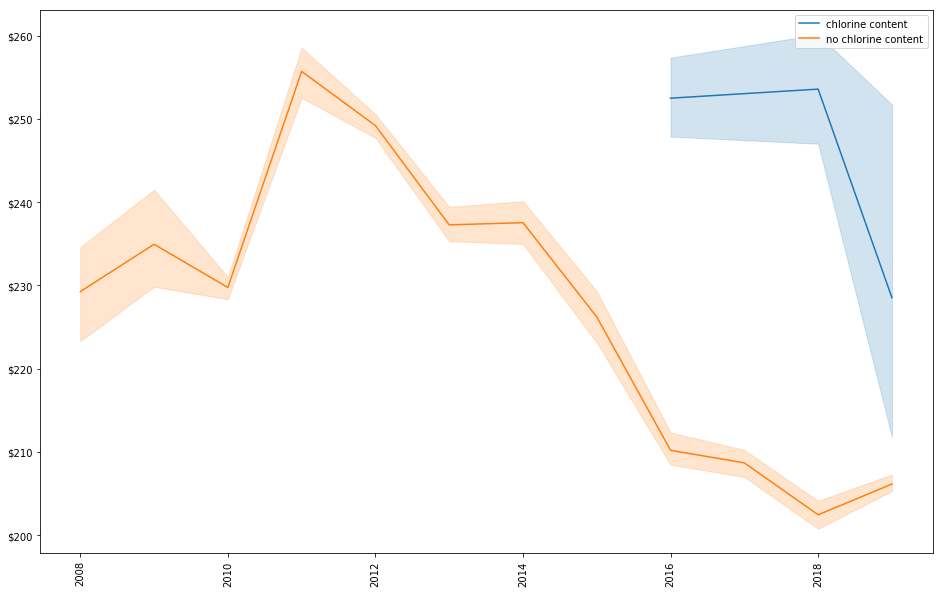

In [26]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

a1 = sns.lineplot(grouped1.year, grouped1.fuel_cost, label="chlorine content")
a1 = sns.lineplot(grouped2.year, grouped2.fuel_cost, label="no chlorine content")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
#blah = a1.set_xticklabels(labels)

In [27]:
df_c1 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] >0)].sort_values(["year", "month"])
grouped1 = df_c1.groupby("year_month").max()
df_c2 = df[(df["fuel_group"] == "Coal") & (df["chlorine_content"] <=0)].sort_values(["year","month"])
grouped2 = df_c2.groupby("year_month").max()

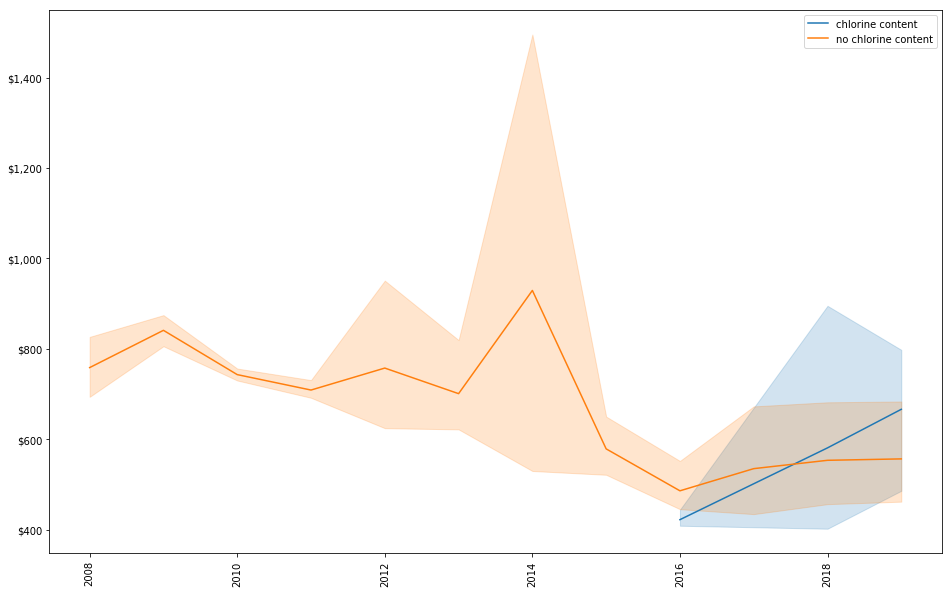

In [28]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=90)

a1 = sns.lineplot(grouped1.year, grouped1.fuel_cost, label="chlorine content")
a1 = sns.lineplot(grouped2.year, grouped2.fuel_cost, label="no chlorine content")

plt.legend()

plt.xlabel("")
plt.ylabel("")
yticks = list(plt.yticks())

yticks = ['${:,}'.format(int(label)) for label in yticks[0]]
blah = a1.set_yticklabels(yticks)
#blah = a1.set_xticklabels(labels)